In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
#Import and clean data
df = pd.read_csv(r'Output/data.csv',
                 dtype={'Place':str,'Date of Birth':dt.datetime,'Date':dt.datetime})

df['Time'] = df['Time'].apply(lambda x: x+'.0' if x.count('.')==0 else x)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f').dt.time
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], infer_datetime_format=True)
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Age'] = (df['Date']-df['Date of Birth']).apply(lambda x: int(x.days/365.25))
df.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Age
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1,London,2012-09-08,Men,800 m,23
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1,Rieti,2010-08-29,Men,800 m,21
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1,Berlin,2010-08-22,Men,800 m,21
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1,Köln,1997-08-24,Men,800 m,26
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1,Zürich,1997-08-13,Men,800 m,26


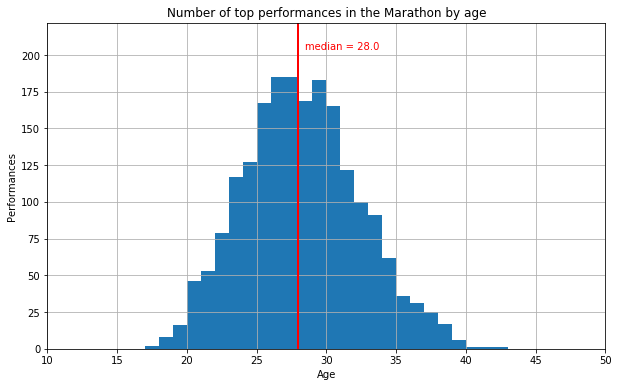

In [3]:
#Distribution of number of top performances by age

#Choose event
event='Marathon'
#Filter athlete's age for performances in the chosen event
age_data = df[df.Event==event]['Age']

#Make histogram with age data
age_data.hist(bins=40,range=(10,50),figsize=(10,6))

#Add title, labels
plt.title('Number of top performances in the '+event+' by age')
plt.xlabel('Age')
plt.ylabel('Performances')

#Plot ranges
plt.ylim([0,age_data.value_counts().max()*1.2])
plt.xlim([10,50])

#Add vertical line with median age
plt.axvline(age_data.median(), color='red', linewidth=2)
plt.annotate('median = '+str(round(age_data.median(),2)), 
             color = 'red',
             xy=(age_data.median()+0.5, 1.1*age_data.value_counts().max()))

plt.show()

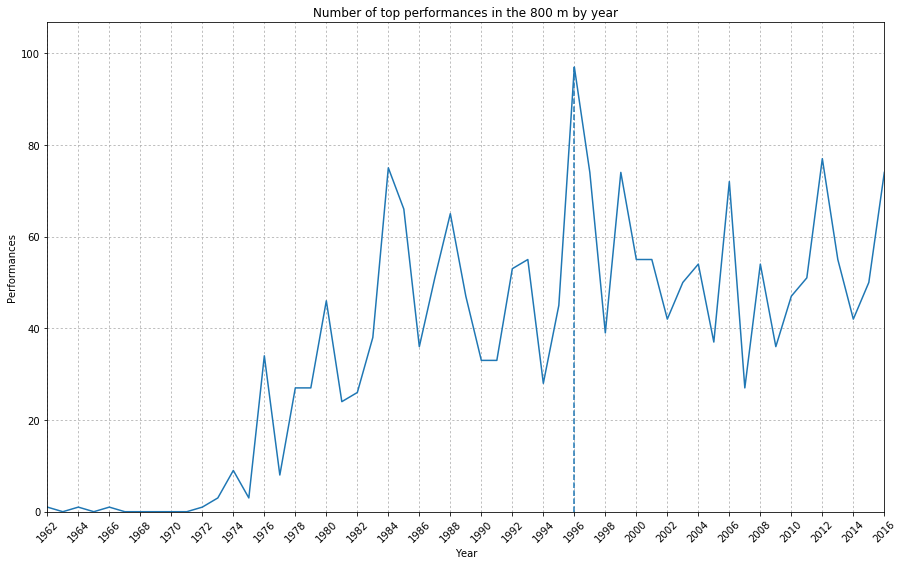

In [4]:
#Distribution of number of top performances by year

#Choose event
event='800 m'

#Filter performance year for performances in the chosen event
year_data = df[df.Event==event]['Date'].apply(lambda x: x.year)

#Compute the number of performances for each year
year_freq = year_data.value_counts()

#Add zero entries for missing years in the range min_yr-2017
min_yr = year_freq.index.min()
zero_yrs = pd.Series(data=0,index=set(range(min_yr,2018))-set(year_freq.index))
year_freq = pd.concat([year_freq,zero_yrs])

#Sort index, drop current year and make line plot
year_freq.sort_index()[:-1].plot(figsize=(15,9))

#Add title, labels, grid, choose y-range
plt.title('Number of top performances in the '+event+' by year')
plt.xlabel('Year')
plt.ylabel('Performances')
plt.grid(ls = 'dotted')
plt.ylim([0,year_freq.max()*1.1])

#Add vertical line and tick for with the year with the most performances
#plt.xticks(list(plt.xticks()[0][1:-1]) + [year_freq.idxmax()],rotation=45)
plt.xticks(range(min_yr,2017,2),rotation=45)
plt.axvline(year_freq.idxmax(), ls='dashed',ymax=1/1.1)

plt.show()

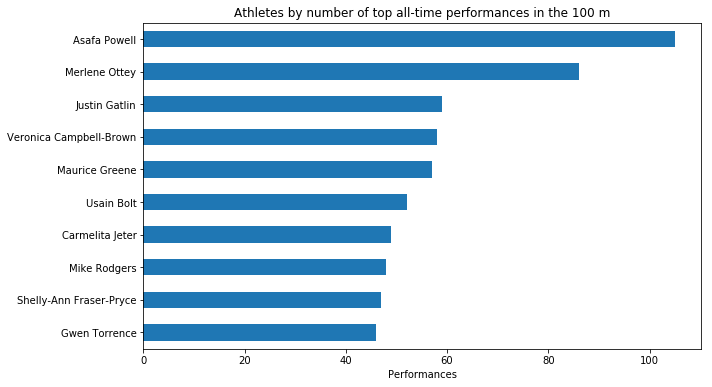

In [5]:
#Athletes by number of top performances

#Choose event
event = '100 m'

#Compute the number of performances per athlete and pick the top 10
data = df[df.Event==event].groupby('Name').Name.count().nlargest(10)

ax = data[::-1].plot(kind='barh',figsize=(10,6), title='Athletes by number of top all-time performances in the '+event)
ax.set(xlabel='Performances',ylabel='')
plt.show()

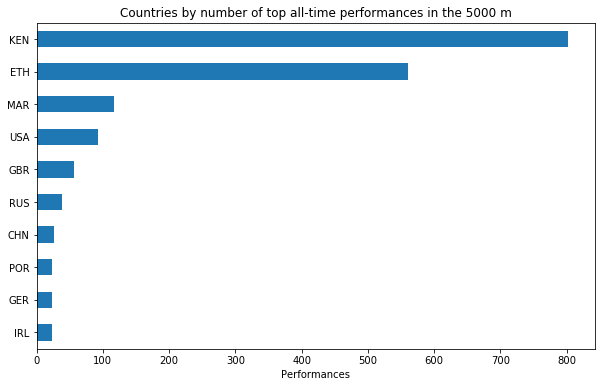

In [6]:
#Countries by number of top performances

#Choose event
event = '5000 m'

#Compute the number of performances per country and pick the top 10
data = df[df.Event==event].groupby('Country').Name.count().nlargest(10)

ax = data[::-1].plot(kind='barh',figsize=(10,6), title='Countries by number of top all-time performances in the '+event)
ax.set(xlabel='Performances',ylabel='')
plt.show()